# Data Loading

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans  
from sklearn.decomposition import PCA  
from sklearn.metrics import silhouette_score  

# Load dataset
df = pd.read_csv(r"C:\Users\SREE HARSHA\OneDrive\Documents\OneDrive\Desktop\Internship\Main Flow\customers.csv")

# Display basic info
print(df.head())
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                 

In this step we completed first step that is Dataset Selection, we have selected a dataset and displayed the first few rows of it

# Data Preprocessing

In [4]:
# Selecting relevant features
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)

In this step we selected relevant features and standardized the data and we converted it again to DataFrame

# Clustering

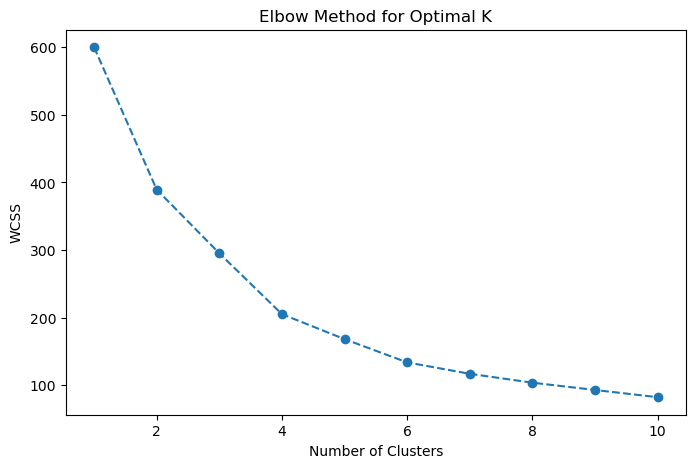

In [6]:
import warnings
warnings.filterwarnings("ignore")
wcss = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)  
    kmeans.fit(df_scaled)  
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

The "elbow" point in the graph indicates the optimal number of clusters.

In [7]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"Silhouette Score for {i} clusters: {score}")

Silhouette Score for 2 clusters: 0.33547192894004574
Silhouette Score for 3 clusters: 0.357793388710272
Silhouette Score for 4 clusters: 0.4039582785148566
Silhouette Score for 5 clusters: 0.41664341513732767
Silhouette Score for 6 clusters: 0.4284167762892593
Silhouette Score for 7 clusters: 0.417231894954916
Silhouette Score for 8 clusters: 0.4082067042807375
Silhouette Score for 9 clusters: 0.41769250624076476
Silhouette Score for 10 clusters: 0.40655411010117015


 using the Silhouette Score for evaluation.

In [9]:
# Applying K-Means with optimal clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# View first few rows with assigned cluster labels
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


Applying K Means Clustering

# Visualization

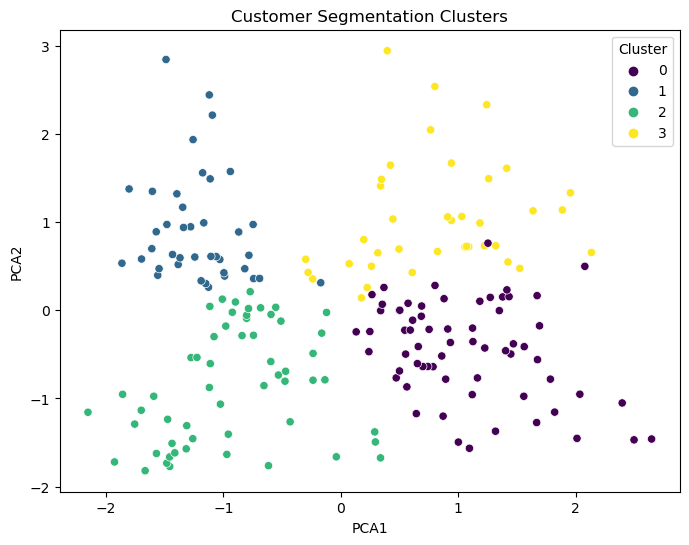

In [11]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="viridis")
plt.title("Customer Segmentation Clusters")
plt.show()

2D Scatter Plot (Using PCA for Dimensionality Reduction)

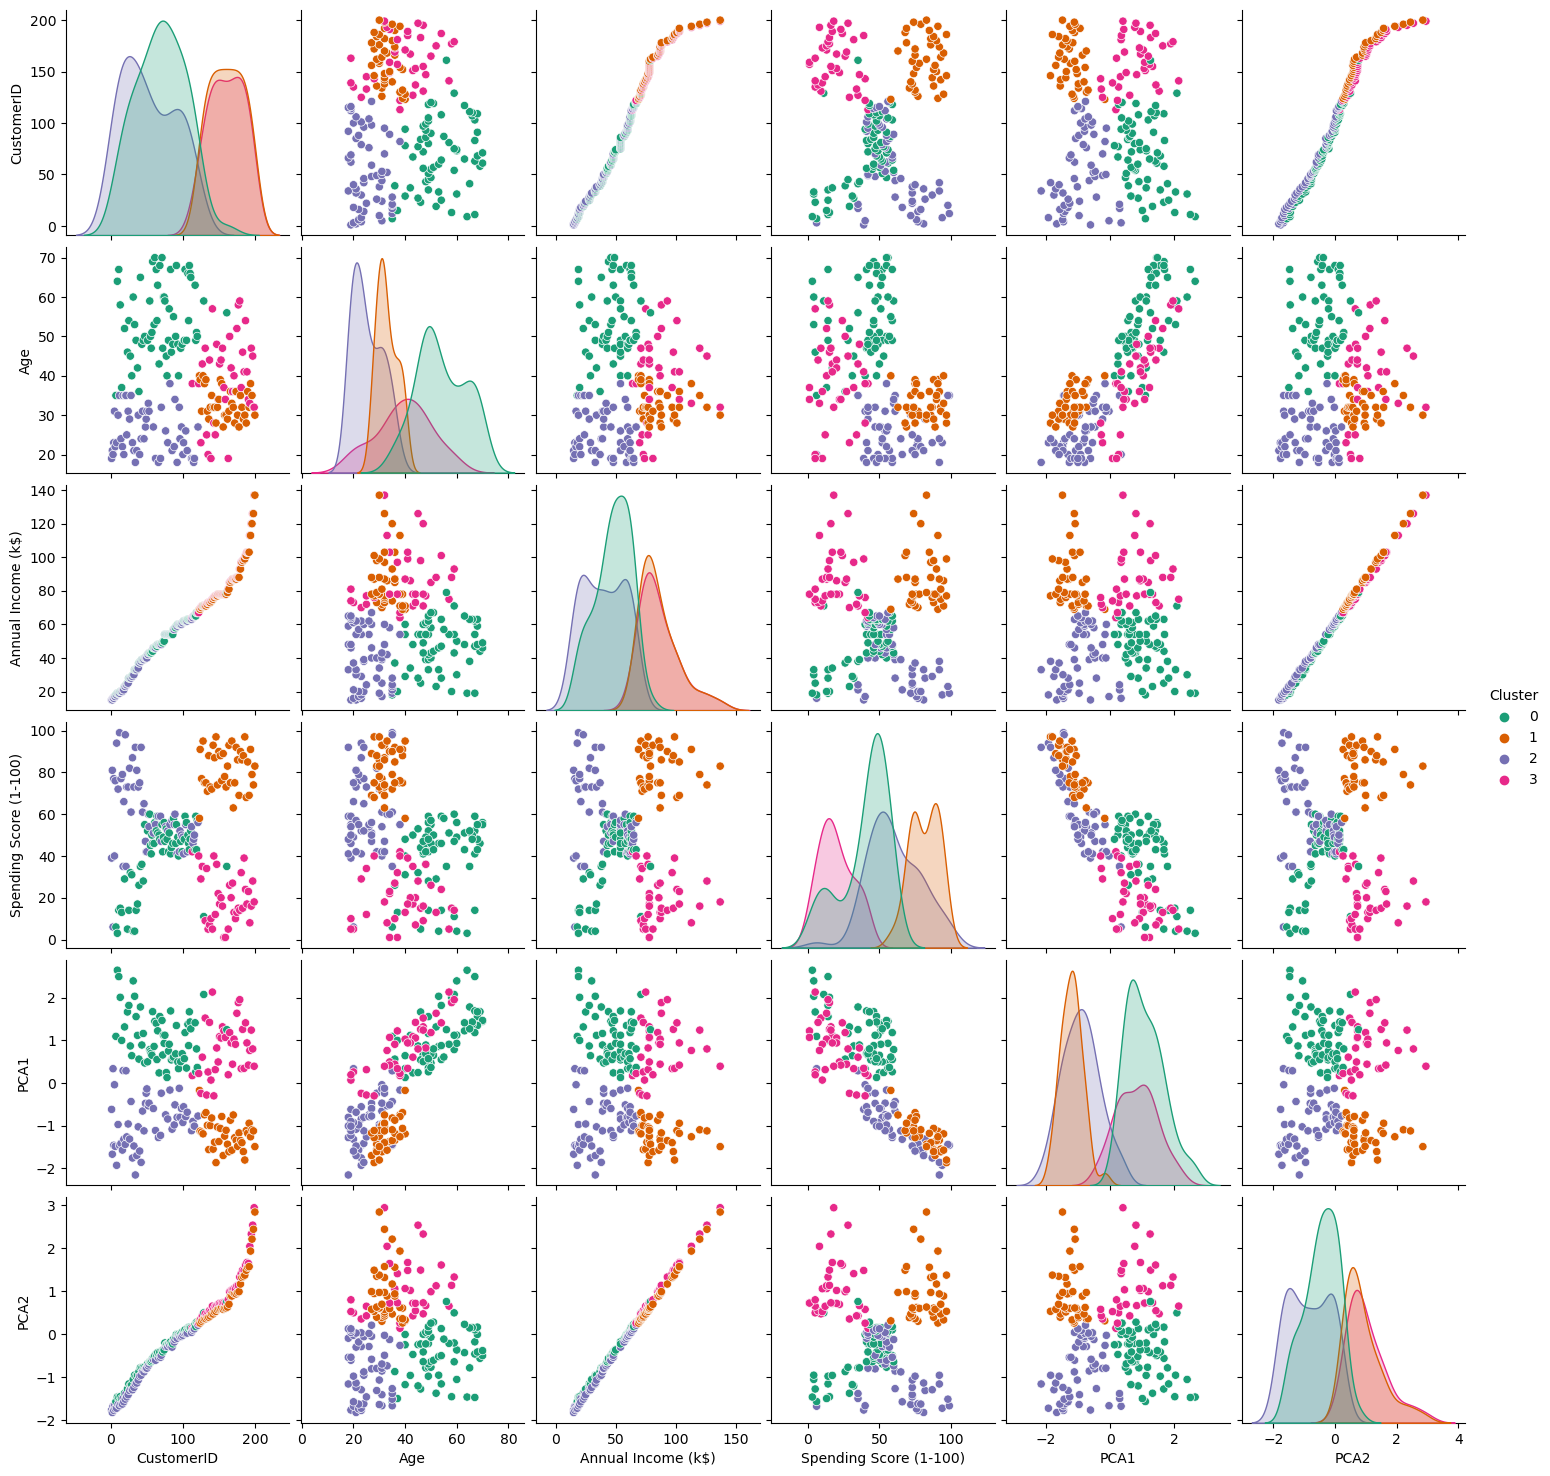

In [12]:
sns.pairplot(df, hue="Cluster", palette="Dark2")
plt.show()

Pair Plot for Feature Relationships

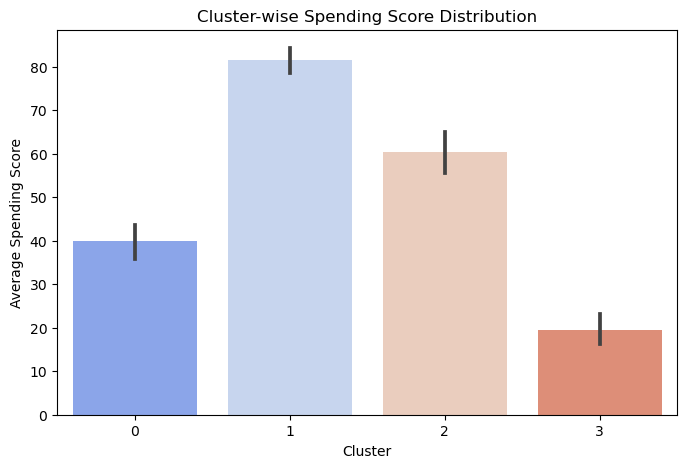

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Cluster"], y=df["Spending Score (1-100)"], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Average Spending Score")
plt.title("Cluster-wise Spending Score Distribution")
plt.show()

 Cluster Centroid Visuals

# Insights & Recommendations

Now that the clusters are formed, we can interpret them:

1️). High-Income, High-Spending Group:
    These are premium customers, ideal for loyalty programs and exclusive offers.

2️). Low-Income, High-Spending Group:
    These customers spend a lot despite lower income; could be influenced by discount offers.

3️). High-Income, Low-Spending Group:
    These customers can be targeted with premium product recommendations.

4️). Low-Income, Low-Spending Group:
    May need budget-friendly offers and promotions to boost sales.

 Business Strategy Recommendations:
i). Focus premium promotions on high-income, high-spending customers.
ii). Offer discounts or loyalty benefits to increase spending for low-spending groups.
iii). Personalize marketing based on customer segment behavior.